# Syntéza pasivních RLC obvodů

Jedná se o syntézu vstupní impedance nebo admitance dvojpólu, která je racionální lomenou funkcí a má v čitateli i jmenovateli polynomy v proměnné $s$.

Vstupem je rovnice popisující impedanci dvojpólu. Pomocí úprav jako je dělení mnohočlenu mnohočlenem, nebo rozkladem na parciální zlomky, se snažíme pořadovanou funkci rozdělit na dílčí části, které jdou realizovat kombinací pasivních prvků.

Aby bylo možné syntézu obvodu provést, musí být požadovaná funkce pozitivní racionální funkcí komplexní frekvence $s$, která odpovídá $\sigma\pm j\omega$.

Polynomy lze zapsat v součtovém tvaru i rozkladem na součin kořenových činitelů, oba zápisy jsou ekvivalentní.

$$ F(s) = \frac{N(s)}{D(s)} = \frac{a_0 + a_1s +...+ a_ms^m }{b_0 + b_1s +...+ b_ns^n} = \frac{\sum_{u=0}^{m}a_us^u}{\sum_{v=0}^{n}a_vs^v}$$

$$ F(s) = \frac{N(s)}{D(s)} = \frac{(s-z_0)(s-z_1)...(s-z_m)}{(s-p_0)(s-p_1)...(s-p_n)} = \frac{\Pi_{u=0}^{m}(s-z_u)}{\Pi_{v=0}^{n}(s-p_v)}$$

## Odbočka - dlení mnohočlenu mnohočlenem
Pokud mnohočlen $A$ dělíme mnohočlenem $B$, postupujeme následovně:

1. vydělíme první člen mnohočlenu $A$ prvním členem mnohočlenu $B$
2. dočasný výsled podílu zapíšeme za rovnáse
3. následně dočasný výsledek roznásobíme mnohočlenm $B$ a výsledek odečteme od mnohočlenu $A$
4. rozdíl opět dělíme prvním členem mnohočlenu $B$
5. opakujeme, dokud nezískáme výsledek

### Příklad:
$$ \frac{4x^2 + 2x + 1}{x + 1} $$

#### Postup:
$$ \dfrac{4x^2}{x} = \underline{4x} $$
$$ 4x \cdot (x + 1) = 4x^2 + 4x $$
$$ (4x^2 + 2x + 1) - (4x^2 + 4x) = -2x + 1 $$
$$ \frac{-2x}{x} = \underline{-2} $$
$$ -2 \cdot (x + 1) = -2x - 2 $$
$$ (-2x + 1) - (-2x - 2) = 3 $$

#### Řešení:
$$ \frac{4x^2 + 2x + 1}{x + 1}  = \underline{\underline{4x -2 + \frac{3}{x+1}}}$$
#### Zkouška:
$$ \left( 4x -2 + \frac{3}{x+1} \right) \cdot (x + 1) = 4x^2 + 4x -2x -2 + 3 = 4x^2 + 2x + 1$$

## Aplikace - příklad na rozklad imitanční funkce postupným dělením:
Cílem bude najít obvody ze vstupní impedancí $\hat{Z_{in}}$ a admitancí $\hat{Y_{in}}$.
$$ F(s) = \frac{s^2 + 2s + 8}{s+2} $$

In [1]:
import sympy as sp
import numpy as np
from numpy import pi
from matplotlib import pyplot as plt
from IPython.display import display, Markdown, Math
from matplotlib import pyplot as plt
from engineering_notation import EngNumber

def sym(number, name: str = None, unit: str = None) -> None:
    name = '' if name is None else f'{name} ='
    unit = '' if unit is None else f'~{unit}'
    display(Math(f'{name}{sp.latex(number)}{unit}'))

In [2]:
s = sp.Symbol('s')
F = sp.apart(
    (s**2 + 2*s + 8) / (s + 2)
)
sym(F, '\hat{F(s)}')

<IPython.core.display.Math object>

Pomocí rozkladu na parciální zlomky lze vidět, z jakých součástek budou obvody realizovány.
$$ \hat{F(s)} = s + \frac{1}{\frac{s}{8} + \frac{1}{4}} $$
$$ \hat{Z_{in}} = L_1s + \frac{1}{C_1s + G_1} $$

$$ \hat{Y_{in}} = C_2s + \frac{1}{L_2s + R_1} $$

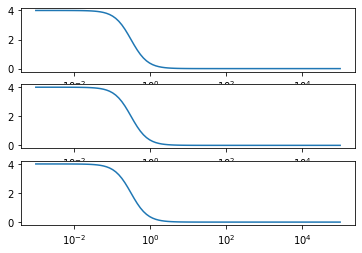

In [3]:
f = np.logspace(-3,5,100)
w = 2*pi*f
s = 1j * w

# první obvod
L1 = 1
C1 = 1/8
G1 = 1/4

# druhý obvod
C2 = 1
L2 = 1/8
R1 = 1/4

F = s + 8/(s+2)
Z = L1*s + 1 / (C1*s + G1)
Y = C2*s + 1 / (L2*s + R1)

plt.subplot(311)
plt.semilogx(f, F)
plt.subplot(312)
plt.semilogx(f, Z)
plt.subplot(313)
plt.semilogx(f, Y)
plt.show()